# First do our imports..

In [0]:
import pandas as pd
import numpy as np

# Then make sure to run the next block so you can use the load_file function

In [0]:
def load_file(data_file,separator=None):
    '''
    A function to load data files into a pandas DataFrame object.
    Inputs:
    1. data_file (required): the path for a data file ending in 'xls', 'xslx', 'cxv' or 'txt'
    2. separator (optional): the character(s) used to separator data in each row of the dataset
    
    Outputs:
    1. A DataFrame object with the data in data_file.
    '''
    
    # if data_file is an excel file, use the read_excel function
    if data_file.endswith('.xls') or data_file.endswith('.xlsx'):
        return pd.read_excel(data_file)
    
    # if the data_file is a .csv or .txt file, check if a separator was specified and load
    elif data_file.endswith('.csv') or data_file.endswith('.txt'):
        if separator:
            return pd.read_csv(data_file,separator=separator)
        else:
            return pd.read_csv(data_file)
        
    # otherwise raise an exception stating that the filetype was unknown
    else:
        print("Unknown file type!")
        raise

# Change raw_csv_url to the URL for your raw csv and load that into your dataframe.

## Take a look at the columns in your dataframe -- these are the possible variables you're going to be able to plot.

In [26]:
raw_csv_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv"
df = load_file(raw_csv_url)

# print the column names
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

# SCATTER PLOTS

## Use the code below to make a scatter plot, picking different possible variables from your column names to put in scatter_column1 and scatter_column2. Which ones make interesting figures? Save those to your computer to present to the class later! (you can do this by right clicking on the figure and pressing save as)

## What happens if you put the same column name in both scatter_column1 and scatter_column2?

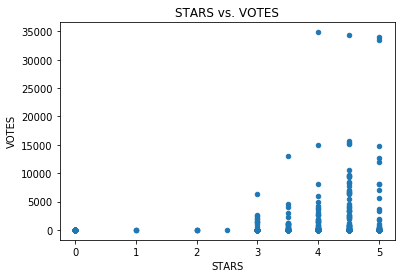

In [10]:
scatter_column1 = 'STARS'
scatter_column2 = 'VOTES'
df.plot.scatter(scatter_column1,scatter_column2,title=scatter_column1+' vs. '+scatter_column2)

# BAR CHARTS

## Now let's make bar charts. Try different variables to plot by changing the column name in bar_column

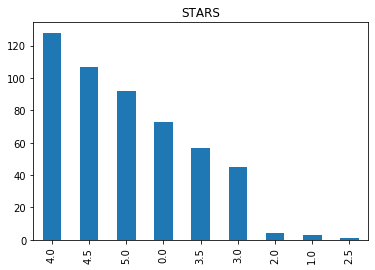

In [17]:
bar_column = 'STARS'
counts = df[bar_column].value_counts()
counts.plot.bar(title=bar_column)

### You can also make horizontal bar charts!

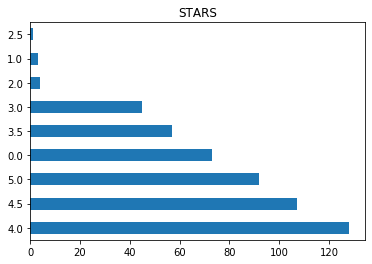

In [18]:
counts.plot.barh(title=bar_column)

### Last class someone asked about sorting your bar charts in the other direction..

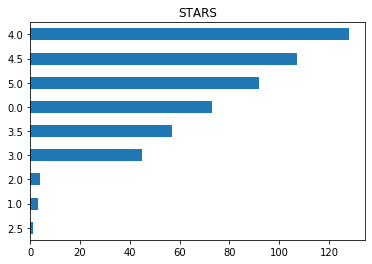

In [24]:
counts.sort_values(ascending=True).plot.barh(title=bar_column)

# Histograms

### Use the following code to create histograms.

### Explore different variables and different numbers of bins.

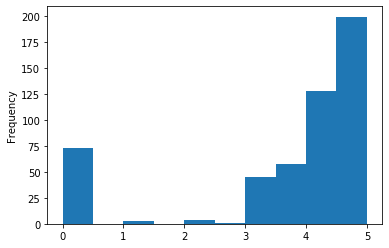

In [56]:
hist_column = 'STARS'
num_bins = 10

df[hist_column].plot.hist(bins=num_bins)

# Line Plots

### Most of you did not pick datasets that have chronological data, so I won't expect many line plots today. But the following is an example of creating a line plot from the baseball dataset.

### This uses the "groupby" method to first group all of the data by year, and then computes the median of the y_column in each year.

### If you would like to create a line plot and need help, let me know and I can work with you!

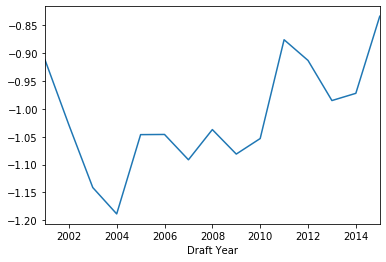

In [94]:
df2 = load_file("https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-draft-2015/historical_projections.csv")
x_column = 'Draft Year'
y_column = 'Projected SPM'
summary_df = df2.groupby(x_column)[y_column].median()
summary_df.plot.line()